Research question: Does exposure to green spaces and tree canopies have an effect on particulate matters levels 10 and 2.5 in the city of Los Angeles?

The data sources we are using are census data, Healthy Places Index (HPI), and Cal Enviro Screen.

We'll start by exploring park access and tree canopy coverage in the HPI data. Let's start by bringing it in.


In [31]:
import pandas as pd

In [32]:
HPI = pd.read_csv('Data/HPI_LA.csv')

In [33]:
HPI.head ()

,CensusTract,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,hpi2_pctile_pos,hpi2_pctile_neg,hpi_top25pct,quintiles,quartiles,economic,economic_pctile,education,education_pctile,housing,houseing_pctile,healthcareaccess,healthcareaccess_pctile,neighborhood,neighborhood_pctile,pollution,pollution_pctile,transportation,transportation_pctile,social,social_pctile,insured,insured_pctile,uncrowded,uncrowded_pctile,homeownership,homeownership_pctile,automobile,automobile_pctile,commute,commute_pctile,inpreschool,inpreschool_pctile,inhighschool,inhighschool_pctile,bachelorsed,bachelorsed_pctile,employed,employed_pctile,abovepoverty,abovepoverty_pctile,income,income_pctile,retail,retail_pctile,parkaccess,parkaccess_pctile,treecanopy,treecanopy_pctile,alcoffsale,alcoffsale_pctile,voting,voting_pctile,ownsevere,ownsevere_pctile,rentsevere,rentsevere_pctile,houserepair,houserepair_pctile,twoparents,twoparents_pctile,supermkts,supermkts_pctile,ozone,ozone_pctile,pm25,pm25_pctile,dieselpm,dieselpm_pctile,h20contam,h20contam_pctile,LEB,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,6037101110,4731,1.9,Los Angeles,91042,6037,Los Angeles,urban_area,-0.329010,29.616322,70.383678,No,4.0,3.0,-0.215356,41.075324,-0.696965,12.819197,-0.518151,19.260875,0.263074,53.663544,-0.088804,36.558450,-0.192949,37.135891,-0.122011,30.206596,-0.774822,18.054664,82.6,53.663544,92.6,42.730656,46.4,36.391634,95.2,53.753368,2.587018,22.622867,0.0,1.873476,100.0,100.000000,19.4,37.469524,70.2,50.327217,58.396947,38.046965,50694.0,35.608880,1.184600,62.671628,97.42126,57.372001,5.855637,57.513153,48.890298,41.768254,52.212960,8.597459,22.981366,9.341717,33.879781,24.932632,97.093023,13.897087,74.819401,40.639035,26.830773,33.761068,0.055122,23.970230,11.21,39.715129,4.579248,88.130373,618.051447,32.092904,78.814964,25.818042,56.140351,1.564151,10.272670,27.985627,3.022617,0.295921,0.084549,0.634115,Wed13Dec17
1,6037101122,3664,0.0,Los Angeles,91042,6037,Los Angeles,urban_area,0.282758,67.214167,32.785833,No,2.0,2.0,1.412227,95.803927,-1.041387,4.991659,0.560145,81.509047,0.345507,56.820223,-0.027630,44.078019,-0.173548,37.777493,0.197624,79.597074,-0.379773,32.375209,83.6,56.820223,96.8,66.033620,84.2,90.273322,100.0,98.986270,3.562341,32.131400,18.2,10.458103,88.7,5.915565,27.2,51.328115,82.8,97.087129,92.509135,96.638008,107400.0,88.848967,0.138138,17.053766,100.00000,81.355062,9.199068,77.005004,72.898472,63.813679,56.547537,16.514821,8.333333,73.386372,29.189189,39.317336,100.000000,80.816117,79.883946,56.229950,0.090228,10.483767,0.055122,23.970230,11.21,39.715129,3.373877,91.094572,616.698272,34.197357,83.013966,72.500962,66.512009,0.709607,13.509825,15.693231,3.165939,0.109170,0.027293,0.272926,Wed13Dec17
2,6037101210,5990,0.9,Los Angeles,91042,6037,Los Angeles,urban_area,-0.359831,27.678686,72.321314,No,4.0,3.0,-0.432119,32.708841,-0.064249,49.544463,-0.593030,16.360837,-0.742607,22.212242,-0.085488,36.981907,-0.185097,37.456692,0.006057,49.621455,-1.200682,8.327987,70.4,22.212242,86.1,24.188374,15.0,6.351854,90.9,28.538432,11.422709,74.502759,54.5,54.677274,100.0,100.000000,16.6,31.643783,73.5,67.868600,44.406664,20.184781,39502.0,19.594508,3.268605,88.066213,100.00000,81.355062,4.011680,32.606185,59.515860,51.058642,51.159115,7.160272,21.739130,11.228025,29.032258,39.843449,99.546485,56.602079,65.051020,17.926344,11.026632,21.865777,0.053109,28.268959,11.21,39.715129,7.327438,80.636469,618.051447,32.092904,83.865809,80.764789,48.247078,3.055092,7.479132,37.045075,3.939900,0.100167,0.050083,0.083472,Wed13Dec17
3,6037101220,3363,0.1,Los Angeles,91042,6037,Los Angeles,urban_area,-0.287624,32.234056,67.765944,No,4.0,3.0,-0.281944,38.329270,-0.024803,51.687412,-0.563676,17.323239,-1.204231,12.986013,-0.087091,36.776594,-0.211347,36.147825,-0.444964,8.584627,-0.130877,42.294367,64.8,12.986013,91.7,39.266008,36.7,24.983960,86.8,16.745798,6.419180,54.112665,53.5,53.406904,100.0

We need to get the leading zero back in the FIPS code

In [34]:
HPI = pd.read_csv(
    'Data/HPI_LA.csv',
    dtype=
    {
        'CensusTract':str,
        'County_FIPS':str,
    }
)

In [35]:
HPI.head ()

,CensusTract,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,hpi2_pctile_pos,hpi2_pctile_neg,hpi_top25pct,quintiles,quartiles,economic,economic_pctile,education,education_pctile,housing,houseing_pctile,healthcareaccess,healthcareaccess_pctile,neighborhood,neighborhood_pctile,pollution,pollution_pctile,transportation,transportation_pctile,social,social_pctile,insured,insured_pctile,uncrowded,uncrowded_pctile,homeownership,homeownership_pctile,automobile,automobile_pctile,commute,commute_pctile,inpreschool,inpreschool_pctile,inhighschool,inhighschool_pctile,bachelorsed,bachelorsed_pctile,employed,employed_pctile,abovepoverty,abovepoverty_pctile,income,income_pctile,retail,retail_pctile,parkaccess,parkaccess_pctile,treecanopy,treecanopy_pctile,alcoffsale,alcoffsale_pctile,voting,voting_pctile,ownsevere,ownsevere_pctile,rentsevere,rentsevere_pctile,houserepair,houserepair_pctile,twoparents,twoparents_pctile,supermkts,supermkts_pctile,ozone,ozone_pctile,pm25,pm25_pctile,dieselpm,dieselpm_pctile,h20contam,h20contam_pctile,LEB,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,06037101110,4731,1.9,Los Angeles,91042,06037,Los Angeles,urban_area,-0.329010,29.616322,70.383678,No,4.0,3.0,-0.215356,41.075324,-0.696965,12.819197,-0.518151,19.260875,0.263074,53.663544,-0.088804,36.558450,-0.192949,37.135891,-0.122011,30.206596,-0.774822,18.054664,82.6,53.663544,92.6,42.730656,46.4,36.391634,95.2,53.753368,2.587018,22.622867,0.0,1.873476,100.0,100.000000,19.4,37.469524,70.2,50.327217,58.396947,38.046965,50694.0,35.608880,1.184600,62.671628,97.42126,57.372001,5.855637,57.513153,48.890298,41.768254,52.212960,8.597459,22.981366,9.341717,33.879781,24.932632,97.093023,13.897087,74.819401,40.639035,26.830773,33.761068,0.055122,23.970230,11.21,39.715129,4.579248,88.130373,618.051447,32.092904,78.814964,25.818042,56.140351,1.564151,10.272670,27.985627,3.022617,0.295921,0.084549,0.634115,Wed13Dec17
1,06037101122,3664,0.0,Los Angeles,91042,06037,Los Angeles,urban_area,0.282758,67.214167,32.785833,No,2.0,2.0,1.412227,95.803927,-1.041387,4.991659,0.560145,81.509047,0.345507,56.820223,-0.027630,44.078019,-0.173548,37.777493,0.197624,79.597074,-0.379773,32.375209,83.6,56.820223,96.8,66.033620,84.2,90.273322,100.0,98.986270,3.562341,32.131400,18.2,10.458103,88.7,5.915565,27.2,51.328115,82.8,97.087129,92.509135,96.638008,107400.0,88.848967,0.138138,17.053766,100.00000,81.355062,9.199068,77.005004,72.898472,63.813679,56.547537,16.514821,8.333333,73.386372,29.189189,39.317336,100.000000,80.816117,79.883946,56.229950,0.090228,10.483767,0.055122,23.970230,11.21,39.715129,3.373877,91.094572,616.698272,34.197357,83.013966,72.500962,66.512009,0.709607,13.509825,15.693231,3.165939,0.109170,0.027293,0.272926,Wed13Dec17
2,06037101210,5990,0.9,Los Angeles,91042,06037,Los Angeles,urban_area,-0.359831,27.678686,72.321314,No,4.0,3.0,-0.432119,32.708841,-0.064249,49.544463,-0.593030,16.360837,-0.742607,22.212242,-0.085488,36.981907,-0.185097,37.456692,0.006057,49.621455,-1.200682,8.327987,70.4,22.212242,86.1,24.188374,15.0,6.351854,90.9,28.538432,11.422709,74.502759,54.5,54.677274,100.0,100.000000,16.6,31.643783,73.5,67.868600,44.406664,20.184781,39502.0,19.594508,3.268605,88.066213,100.00000,81.355062,4.011680,32.606185,59.515860,51.058642,51.159115,7.160272,21.739130,11.228025,29.032258,39.843449,99.546485,56.602079,65.051020,17.926344,11.026632,21.865777,0.053109,28.268959,11.21,39.715129,7.327438,80.636469,618.051447,32.092904,83.865809,80.764789,48.247078,3.055092,7.479132,37.045075,3.939900,0.100167,0.050083,0.083472,Wed13Dec17
3,06037101220,3363,0.1,Los Angeles,91042,06037,Los Angeles,urban_area,-0.287624,32.234056,67.765944,No,4.0,3.0,-0.281944,38.329270,-0.024803,51.687412,-0.563676,17.323239,-1.204231,12.986013,-0.087091,36.776594,-0.211347,36.147825,-0.444964,8.584627,-0.130877,42.294367,64.8,12.986013,91.7,39.266008,36.7,24.983960,86.8,16.745798,6.419180,54.112665,53.5,53.4069

Leading zero is back so we'll check to make sure the data is the correct type (object) 

In [36]:
HPI.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 91 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CensusTract              986 non-null    object 
 1   pop2010                  986 non-null    int64  
 2   pct2010gq                986 non-null    float64
 3   City                     982 non-null    object 
 4   ZIP                      986 non-null    int64  
 5   County_FIPS              986 non-null    object 
 6   County_Name              986 non-null    object 
 7   UrbanType                986 non-null    object 
 8   hpi2score                977 non-null    float64
 9   hpi2_pctile_pos          977 non-null    float64
 10  hpi2_pctile_neg          977 non-null    float64
 11  hpi_top25pct             977 non-null    object 
 12  quintiles                977 non-null    float64
 13  quartiles                977 non-null    float64
 14  economic                 9

In [37]:
HPI.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 91 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CensusTract              986 non-null    object 
 1   pop2010                  986 non-null    int64  
 2   pct2010gq                986 non-null    float64
 3   City                     982 non-null    object 
 4   ZIP                      986 non-null    int64  
 5   County_FIPS              986 non-null    object 
 6   County_Name              986 non-null    object 
 7   UrbanType                986 non-null    object 
 8   hpi2score                977 non-null    float64
 9   hpi2_pctile_pos          977 non-null    float64
 10  hpi2_pctile_neg          977 non-null    float64
 11  hpi_top25pct             977 non-null    object 
 12  quintiles                977 non-null    float64
 13  quartiles                977 non-null    float64
 14  economic                 9

The only columns we are interested in right now are "cenus tract", "County_FIPS", "parkaccess", "parkaccess_pctile", "treecanopy", and "treecanopy_pctile". So lets trim our data and drop the rest of the columns.

In [38]:
desired_columns = ['CensusTract','parkaccess','parkaccess_pctile', 'treecanopy', 'treecanopy_pctile']
HPI [desired_columns]
HPI_trimmed = HPI [desired_columns]
HPI_trimmed

,CensusTract,parkaccess,parkaccess_pctile,treecanopy,treecanopy_pctile
0,06037101110,97.421260,57.372001,5.855637,57.513153
1,06037101122,100.000000,81.355062,9.199068,77.005004
2,06037101210,100.000000,81.355062,4.011680,32.606185
3,06037101220,88.760040,47.055049,4.652362,44.116515
4,06037101300,90.735890,49.133838,7.477775,69.023483
5,06037101400,100.000000,81.355062,11.569848,83.344027
6,06037102103,84.942530,43.346593,7.454270,68.933658
7,06037102104,100.000000,81.355062,8.388434,73.796997
8,06037102105,88.099360,46.400616,6.253036,61.183113
9,06037102107,63.074530,29.359682,10.667887,81.380726


Lets rename our columns so they're a little more user friendly

In [39]:
columns = list(HPI_trimmed)
columns

['CensusTract',
 'parkaccess',
 'parkaccess_pctile',
 'treecanopy',
 'treecanopy_pctile']

In [40]:
HPI_trimmed.columns = ['FIPS',
 'Park_Access',
 'Park_Access_Percentile',
 'Tree_Canopy',
 'Tree_Canopy_Percentile']

In [41]:
HPI_trimmed.head ()

,FIPS,Park_Access,Park_Access_Percentile,Tree_Canopy,Tree_Canopy_Percentile
0,06037101110,97.42126,57.372001,5.855637,57.513153
1,06037101122,100.00000,81.355062,9.199068,77.005004
2,06037101210,100.00000,81.355062,4.011680,32.606185
3,06037101220,88.76004,47.055049,4.652362,44.116515
4,06037101300,90.73589,49.133838,7.477775,69.023483


Now that our data is cleaned up we want to start visualzation to see where our park access and tree canopy coverage are located in the city

We'll start by looking at tree canopy which as defined by the HPI "This indicator measures the percentage of land with tree canopy (weighted by number of people per acre)" 

In [42]:
HPI_trimmed = HPI_trimmed.sort_values(by='Tree_Canopy',ascending = False)

In [43]:
HPI_trimmed[['FIPS','Tree_Canopy']].head(10)

,FIPS,Tree_Canopy
825,06037261200,20.652590
338,06037141600,20.210195
823,06037261101,19.883298
337,06037141500,19.569714
336,06037141400,19.486557
324,06037139701,19.125964
826,06037262100,19.086587
830,06037262303,18.941309
822,06037243100,18.882921
347,06037143604,18.562241


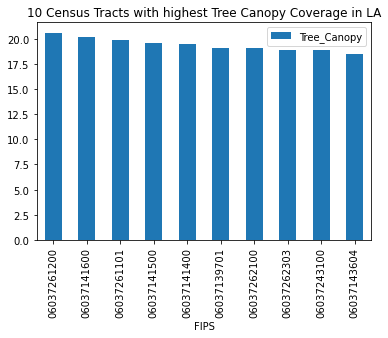

In [44]:
HPI_trimmed.sort_values('Tree_Canopy',ascending=False).head(10).plot.bar(x='FIPS',
                            y='Tree_Canopy',
                           title='10 Census Tracts with highest Tree Canopy Coverage in LA')

In [45]:
HPI_trimmed = HPI_trimmed.sort_values(by='Tree_Canopy',ascending = True)

In [46]:
HPI_trimmed[['FIPS','Tree_Canopy']].head(10)

,FIPS,Tree_Canopy
700,06037226001,1.602414
533,06037206050,1.764766
600,06037212303,1.799636
691,06037224010,2.162962
567,06037209401,2.213683
558,06037208802,2.289196
724,06037229420,2.343863
539,06037207301,2.400490
879,06037269904,2.432109
697,06037224420,2.570740


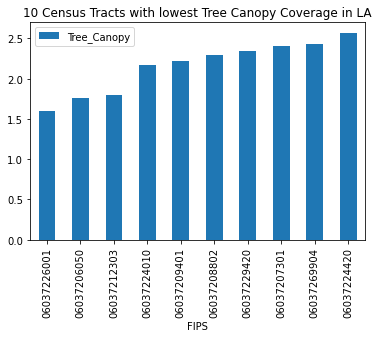

In [51]:
HPI_trimmed.head(10).plot.bar(x='FIPS',
                            y='Tree_Canopy',
                           title='10 Census Tracts with lowest Tree Canopy Coverage in LA')

Next we'll look at park access which according to HPI "This indicator measures the percentage of the population living within a half-mile of a park, beach, or open space that is larger than 1 acre. A half mile is an approximately 10-minute walk for many people."

Park access is tricky because there a lot of census tracts that have 100% park access and a lot of census tracts that have 0% park access so creating charts for the two extremes won't be that interesting, but a map may be.

In [52]:
HPI_trimmed.Park_Access.describe()

count    977.000000
mean      67.051609
std       36.934516
min        0.000000
25%       35.202270
50%       84.114320
75%      100.000000
max      100.000000
Name: Park_Access, dtype: float64

In [53]:
HPI_trimmed[['FIPS','Park_Access']].head(10)

,FIPS,Park_Access
700,06037226001,30.29925
533,06037206050,75.54637
600,06037212303,100.00000
691,06037224010,83.97275
567,06037209401,100.00000
558,06037208802,100.00000
724,06037229420,63.37313
539,06037207301,100.00000
879,06037269904,99.87619
697,06037224420,81.75182


Knowing which census tracts have the most/ least tree canopy coverage and park access is fine but in order to visualize this and make meaning of it we need some maps

In [54]:
import geopandas as gpd

In [55]:
lacounty=gpd.read_file('Data/la_tracts-Copy1.geojson')
lacounty.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [56]:
lacounty.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   kind          2346 non-null   object  
 1   external_id   2346 non-null   object  
 2   name          2346 non-null   object  
 3   slug          2346 non-null   object  
 4   set           2346 non-null   object  
 5   metadata      2346 non-null   object  
 6   resource_uri  2346 non-null   object  
 7   geometry      2346 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 146.8+ KB


In [57]:
lacounty = lacounty[['name','geometry']]
lacounty.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [58]:
lacounty.columns = ['FIPS','geometry']
lacounty.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


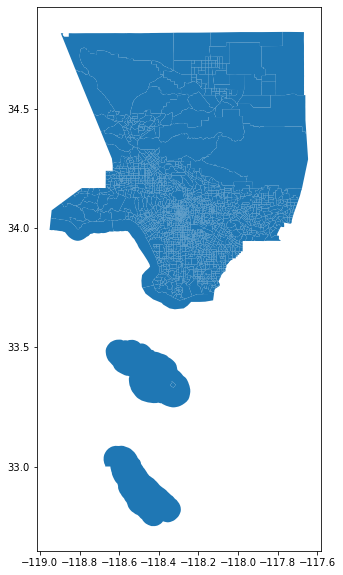

In [59]:
lacounty.plot(figsize=(12,10))

Now, we need to merge the 'HPI_trimmed' with the 'lacounty' data by matching the FIPS code/column
we will call this new merged dataset 'LA'

In [60]:
LA = lacounty.merge(HPI_trimmed,on='FIPS')

In [61]:
LA.head ()

,FIPS,geometry,Park_Access,Park_Access_Percentile,Tree_Canopy,Tree_Canopy_Percentile
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",97.42126,57.372001,5.855637,57.513153
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",100.00000,81.355062,9.199068,77.005004
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",100.00000,81.355062,4.011680,32.606185
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",88.76004,47.055049,4.652362,44.116515
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",90.73589,49.133838,7.477775,69.023483


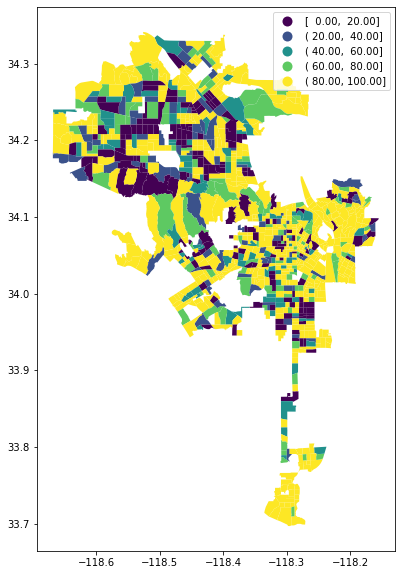

In [63]:
LA.plot(figsize=(12,10),
                 column='Park_Access',
                 legend=True, 
                 scheme='equal_interval')

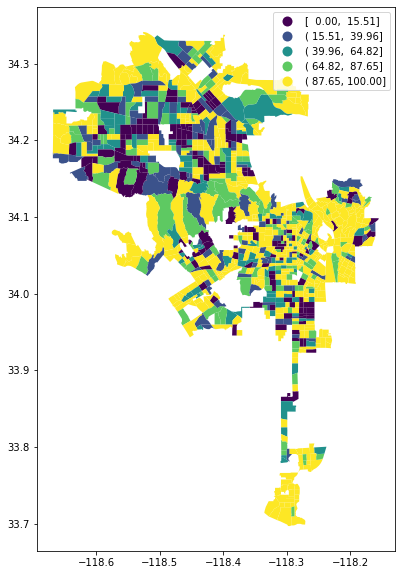

In [64]:
LA.plot(figsize=(12,10),
                 column='Park_Access',
                 legend=True, 
                 scheme='natural_breaks')

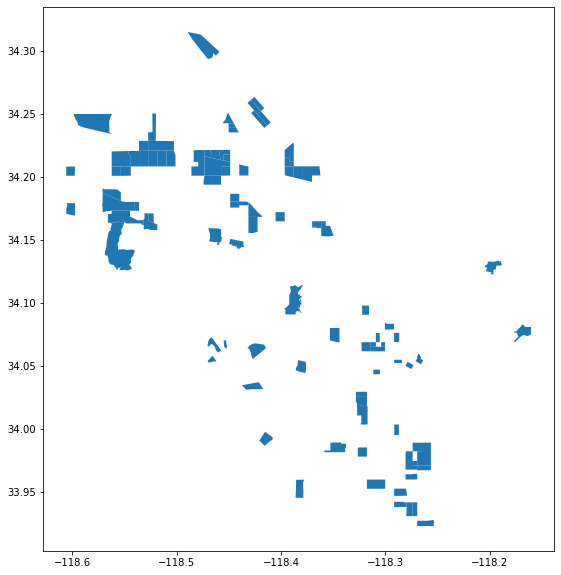

In [35]:
LA[LA.Park_Access==0].plot(figsize=(12,10))

Map 1: Census Tracts in LA with 0% park access 

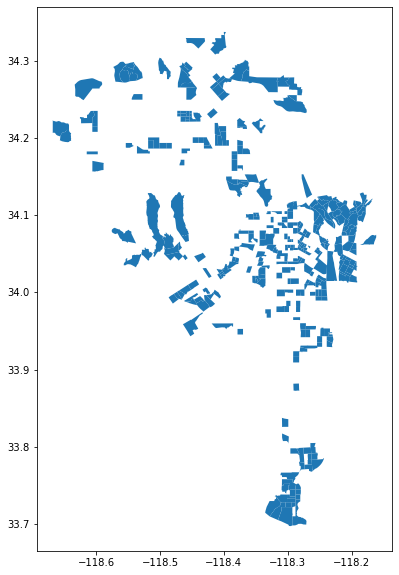

In [36]:
LA[LA.Park_Access==100].plot(figsize=(12,10))

Census tracts with 100% park access

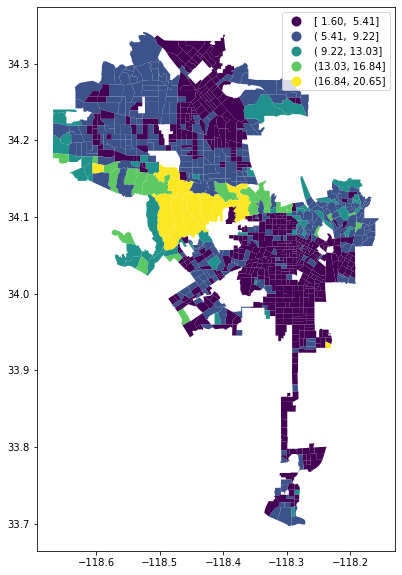

In [65]:
LA.plot(figsize=(12,10),
                 column='Tree_Canopy',
                 legend=True, 
                 scheme='equal_interval')

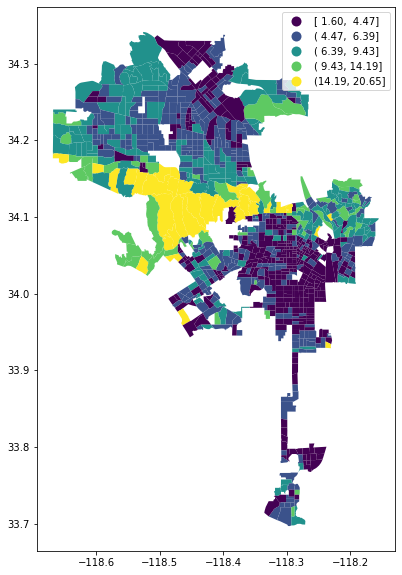

In [66]:
LA.plot(figsize=(12,10),
                 column='Tree_Canopy',
                 legend=True, 
                 scheme='natural_breaks')

Now we want to add a basemap so this data makes sense and we can better visualize it. 

In [37]:
import folium 

In [41]:
m = folium.Map(location=[34.3,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.Choropleth(
                  geo_data=LA, # geo data
                  data=LA, # data          
                  key_on='feature.properties.FIPS',
                  columns=['FIPS','Park_Access'],

SyntaxError: unexpected EOF while parsing (<ipython-input-41-65ca078e3a53>, line 10)

In [2]:
import osmnx as ox

import pandas as pd

import geopandas as gpd

import contextily as ctx

In [3]:
address = 'Los Angeles,Los Angeles,CA'

In [4]:
%%time
osm = ox.geometries_from_address(address,tags={'leisure':True},dist=20000)

CPU times: user 4.4 s, sys: 491 ms, total: 4.89 s
Wall time: 26.4 s


In [5]:
osm.shape

(16885, 154)

In [6]:
osm.sample (10)

,unique_id,osmid,element_type,access,barrier,geometry,name,natural,highway,created_by,...,landcover,fields,proposed,garden:type,playground:theme,ways,type,gnis:crea,name:de,protection_title
8093,way/484278587,484278587,way,NaN,NaN,"POLYGON ((-118.31653 34.10591, -118.31653 34.1...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4354,way/429324663,429324663,way,NaN,NaN,"POLYGON ((-118.23882 34.05656, -118.23880 34.0...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3160,way/400482430,400482430,way,NaN,NaN,"POLYGON ((-118.27110 34.16727, -118.27111 34.1...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,way/201743419,201743419,way,NaN,NaN,"POLYGON ((-118.27679 34.05949, -118.27698 34.0...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,way/522695488,522695488,way,NaN,NaN,"POLYGON ((-118.40413 34.06363, -118.40415 34.0...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16793,relation/5318904,5318904,relation,NaN,NaN,"POLYGON ((-118.05188 33.87778, -118.05186 33.8...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"[356327410, 356327412]",multipolygon,NaN,NaN,NaN
6513,way/482557123,482557123,way,NaN,NaN,"POLYGON ((-118.38995 34.11609, -118.38996 34.1...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8718,way/488528624,488528624,way,NaN,NaN,"POLYGON ((-118.38651 34.10114, -118.38649 34.1...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13165,way/604420367,604420367,way,NaN,NaN,"POLYGON ((-118.31932 34.11362, -118.31932 34.1...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12104,way/575694530,575694530,way,private,NaN,"POLYGON ((-118.41902 34.07673, -118.41896 34.0...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
list (osm)

['unique_id',
 'osmid',
 'element_type',
 'access',
 'barrier',
 'geometry',
 'name',
 'natural',
 'highway',
 'created_by',
 'leisure',
 'website',
 'wheelchair',
 'sport',
 'source',
 'source_ref',
 'entrance',
 'ele',
 'gnis:county_id',
 'gnis:created',
 'gnis:feature_id',
 'gnis:state_id',
 'wikidata',
 'fixme',
 'wikipedia',
 'opening_hours',
 'addr:city',
 'addr:housenumber',
 'addr:postcode',
 'addr:state',
 'addr:street',
 'operator',
 'gnis:edited',
 'gnis:county_name',
 'gnis:import_uuid',
 'gnis:reviewed',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'addr:country',
 'addr:housename',
 'note',
 'contact:phone',
 'contact:website',
 'phone',
 'historic',
 'covered',
 'amenity',
 'cuisine',
 'dance:teaching',
 'smoking',
 'addr:suburb',
 'level',
 'name:cs',
 'name:en',
 'hoops',
 'lit',
 'surface',
 'description',
 'backrest',
 'addr:unit',
 'email',
 'url',
 'fee',
 'parking',
 'max_age',
 'min_age',
 'tourism',
 'location',
 'alt_name',
 'swimming_pool',
 'bench',
 'co

In [8]:
osm.info ()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16885 entries, 0 to 16884
Columns: 154 entries, unique_id to protection_title
dtypes: geometry(1), int64(1), object(152)
memory usage: 20.0+ MB


In [9]:
columns_to_keep = ['geometry','leisure']
osm = osm[columns_to_keep]
osm.sample

<bound method NDFrame.sample of                                                 geometry     leisure
0                            POINT (-118.36186 34.00615)  playground
1                            POINT (-118.36956 34.01036)  playground
2                            POINT (-118.36837 34.00682)  playground
3                            POINT (-118.45803 33.97977)  playground
4                            POINT (-118.39957 33.99270)  playground
...                                                  ...         ...
16880  POLYGON ((-118.10520 34.07526, -118.10520 34.0...        park
16881  POLYGON ((-118.38595 34.01376, -118.38630 34.0...        park
16882  POLYGON ((-118.37286 34.01141, -118.37356 34.0...        park
16883  POLYGON ((-118.41633 34.11306, -118.41625 34.1...        park
16884  POLYGON ((-118.18391 33.89086, -118.18391 33.8...       track

[16885 rows x 2 columns]>

In [13]:
osm_leisure_counts = osm.leisure.value_counts()
osm_leisure_counts


swimming_pool        11585
pitch                 2592
park                  1073
playground             379
garden                 285
picnic_table           262
track                  126
fitness_centre         106
sports_centre          105
firepit                 96
outdoor_seating         52
golf_course             43
stadium                 32
bleachers               27
bowling_alley           23
dog_park                21
nature_reserve          14
fitness_station         14
amusement_arcade         6
dance                    6
slipway                  5
water_park               5
court                    3
recreation_ground        3
horse_riding             3
sauna                    2
sports_hall              2
swimming_pools           2
common                   2
bandstand                1
disc_golf_course         1
marina                   1
boardgames               1
miniature_golf           1
yes                      1
tanning_salon            1
ice_rink                 1
w

In [14]:
type(osm_leisure_counts)

pandas.core.series.Series

In [15]:
df_osm_leisure_types = pd.DataFrame(osm_leisure_counts)
df_osm_leisure_types

,leisure
swimming_pool,11585
pitch,2592
park,1073
playground,379
garden,285
picnic_table,262
track,126
fitness_centre,106
sports_centre,105
firepit,96


In [17]:
df_osm_leisure_types = df_osm_leisure_types.reset_index()
df_osm_leisure_types

,index,leisure
0,swimming_pool,11585
1,pitch,2592
2,park,1073
3,playground,379
4,garden,285
5,picnic_table,262
6,track,126
7,fitness_centre,106
8,sports_centre,105
9,firepit,96


In [18]:
df_osm_leisure_types.columns = ['leisure_type','count']
df_osm_leisure_types

,leisure_type,count
0,swimming_pool,11585
1,pitch,2592
2,park,1073
3,playground,379
4,garden,285
5,picnic_table,262
6,track,126
7,fitness_centre,106
8,sports_centre,105
9,firepit,96


In [19]:
type(osm)

geopandas.geodataframe.GeoDataFrame

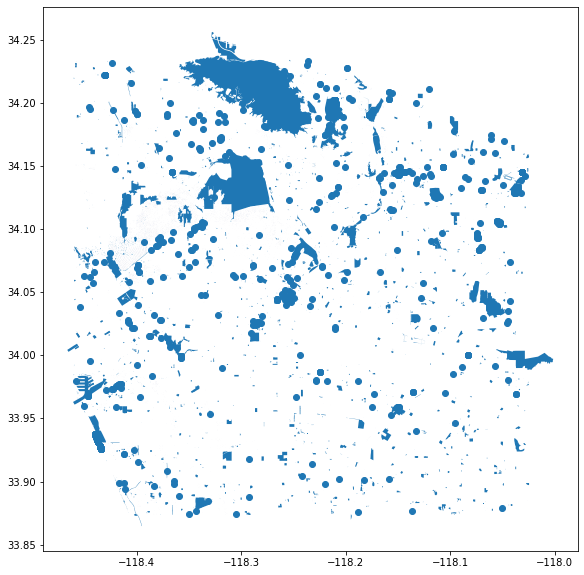

In [20]:
ax = osm.plot(figsize=(10,10))

(-118.489767495, -117.978307205, 33.84513429, 34.27599131)

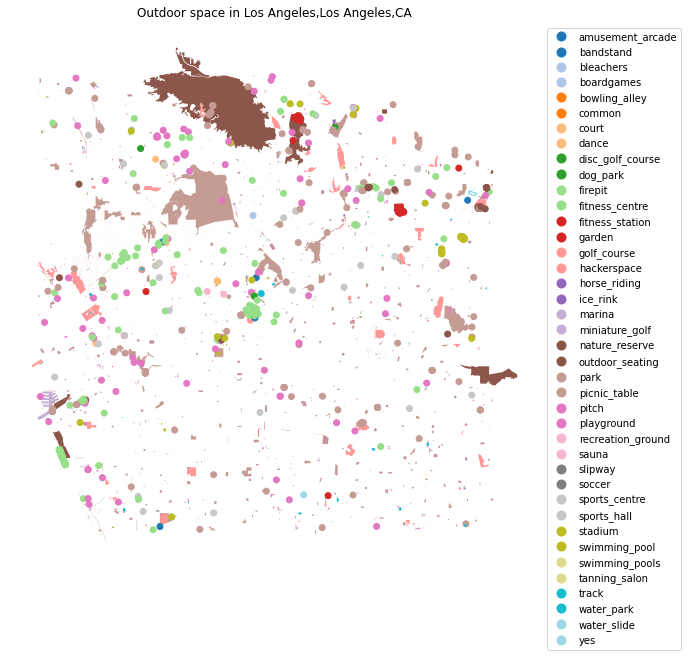

In [22]:
ax = osm.plot(figsize=(10,10),
         column='leisure',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax.set_title('Outdoor space in ' + address)

# get rid of the axis
ax.axis('off')

In [23]:
osm_web_mercator = osm.to_crs(epsg=3857)

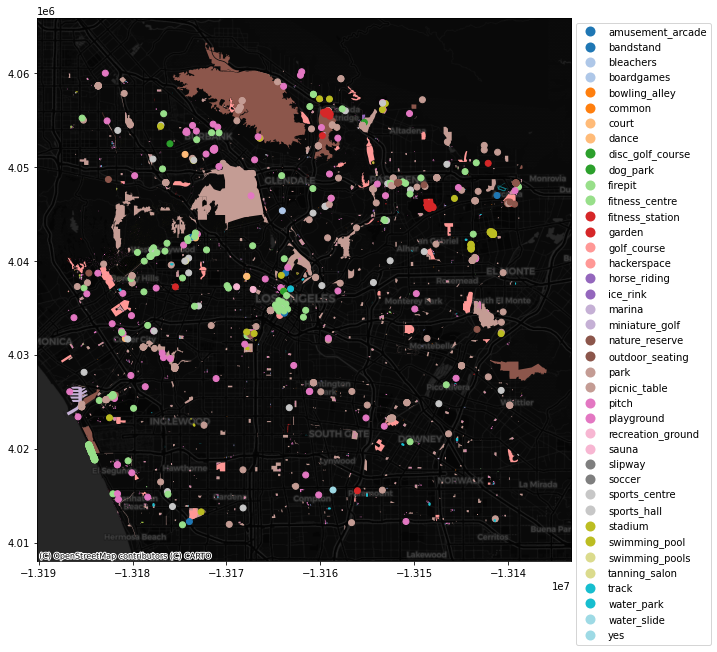

In [24]:
ax = osm_web_mercator.plot(figsize=(10,10),
                            column='leisure',
                            cmap='tab20',
                            legend=True,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

# add the basemap

# open street map basemap
# ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

All lesisure areas in city of LA. Park is in light brown but we want to just focus on parks and not have all the other columns. So lets make a different type of map. 

We want to look at just park data now and we want it to be interactive so we're going to use Socrata 

In [168]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata

In [169]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("3hkw-9rsc", limit=2000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
df.sample(2)


HTTPError: 404 Client Error: Not Found

In [140]:
df = pd.DataFrame.from_records(results)

In [141]:
df.shape

(561, 14)

In [142]:
df.info

<bound method DataFrame.info of                                               the_geom objectid  \
0    {'type': 'MultiPolygon', 'coordinates': [[[[-1...        1   
1    {'type': 'MultiPolygon', 'coordinates': [[[[-1...        2   
2    {'type': 'MultiPolygon', 'coordinates': [[[[-1...        3   
3    {'type': 'MultiPolygon', 'coordinates': [[[[-1...        4   
4    {'type': 'MultiPolygon', 'coordinates': [[[[-1...        5   
..                                                 ...      ...   
556  {'type': 'MultiPolygon', 'coordinates': [[[[-1...      558   
557  {'type': 'MultiPolygon', 'coordinates': [[[[-1...      568   
558  {'type': 'MultiPolygon', 'coordinates': [[[[-1...      579   
559  {'type': 'MultiPolygon', 'coordinates': [[[[-1...      580   
560  {'type': 'MultiPolygon', 'coordinates': [[[[-1...      582   

                                            name_alpha       area_acres  \
0                    ROBERT F KENNEDY PARK (LAUSD) JUA   0.149251627315   
1            

In [143]:
df.head ()

,the_geom,objectid,name_alpha,area_acres,park_id,cd_real,name_publi,address,region,name,issubpark,park_class,shape_leng,shape_area
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",1,ROBERT F KENNEDY PARK (LAUSD) JUA,0.149251627315,1056,10,Kennedy (Robert F) Inspiration Memorial Park (...,"3400 W Wilshire Blvd, LA 90010",M,Robert F Kennedy Inspiration Memorial Park,N,N,641.47054538,6501.37488025
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",2,SYCAMORE GROVE PARK,15.8738513625,736,01,Sycamore Grove Park,"4702 N Figueroa St, LA 90042",M,Sycamore Grove Park,N,C,6227.3991903,691462.199493
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",3,SAN PEDRO WELCOME PARK,0.399500174163,328,15,Formerly Welcome Park,"451 N Gaffey St, San Pedro 90731",P,San Pedro Welcome Park,N,N,560.372862441,17402.1579777
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",4,COUNTRY CLUB PARK HERITAGE PLAZA,0.0837434158085,1045,10,AKA Wilton Place Park,"1015 S Wilton Pl, LA 90018",M,Country Club Heritage Park,N,N,287.523337381,3647.84860118
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",5,WATTS CULTURAL CRESCENT,2.95670043382,1046,15,AKA Watts Towers Cultural Cresent,"1780 E Santa Ana Blvd, LA 90002",P,Watts Cultural Crescent,N,N,2852.11033344,128793.355722


In [145]:
df_mini = df[['name_alpha','area_acres','park_id','address','shape_leng','shape_area']].copy()
df_mini.head()

,name_alpha,area_acres,park_id,address,shape_leng,shape_area
0,ROBERT F KENNEDY PARK (LAUSD) JUA,0.149251627315,1056,"3400 W Wilshire Blvd, LA 90010",641.47054538,6501.37488025
1,SYCAMORE GROVE PARK,15.8738513625,736,"4702 N Figueroa St, LA 90042",6227.3991903,691462.199493
2,SAN PEDRO WELCOME PARK,0.399500174163,328,"451 N Gaffey St, San Pedro 90731",560.372862441,17402.1579777
3,COUNTRY CLUB PARK HERITAGE PLAZA,0.0837434158085,1045,"1015 S Wilton Pl, LA 90018",287.523337381,3647.84860118
4,WATTS CULTURAL CRESCENT,2.95670043382,1046,"1780 E Santa Ana Blvd, LA 90002",2852.11033344,128793.355722


In [146]:
df_mini['shape_leng'] = df_mini['shape_leng'].astype(float)
df_mini['shape_area'] = df_mini['shape_area'].astype(float)
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name_alpha  561 non-null    object 
 1   area_acres  561 non-null    object 
 2   park_id     561 non-null    object 
 3   address     561 non-null    object 
 4   shape_leng  561 non-null    float64
 5   shape_area  561 non-null    float64
dtypes: float64(2), object(4)
memory usage: 26.4+ KB


In [154]:
px.scatter(df_mini,
           x='shape_leng',
           y='shape_area'
          )

In [160]:
fig = px.scatter_mapbox(df_mini,
                        lat='shape_leng',
                        lon='shape_area',
                        mapbox_style="stamen-terrain")
fig.show ()

In [161]:
fig = px.scatter_mapbox(df_mini, 
                        lat='shape_leng',
                        lon='shape_area',
                        color="descent_cd"
                       )
fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['name_alpha', 'area_acres', 'park_id', 'address', 'shape_leng', 'shape_area'] but received: descent_cd

**MAP OVERLAY**

In [1]:
import geopandas as gpd

In [5]:
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

In [7]:
neighborhoods = neighborhoods[['name','geometry']]
neighborhoods.head ()

,name,geometry
0,Acton,"MULTIPOLYGON (((-118.20262 34.53899, -118.1894..."
1,Adams-Normandie,"MULTIPOLYGON (((-118.30901 34.03741, -118.3004..."
2,Agoura Hills,"MULTIPOLYGON (((-118.76193 34.16820, -118.7263..."
3,Agua Dulce,"MULTIPOLYGON (((-118.25468 34.55830, -118.2555..."
4,Alhambra,"MULTIPOLYGON (((-118.12175 34.10504, -118.1168..."


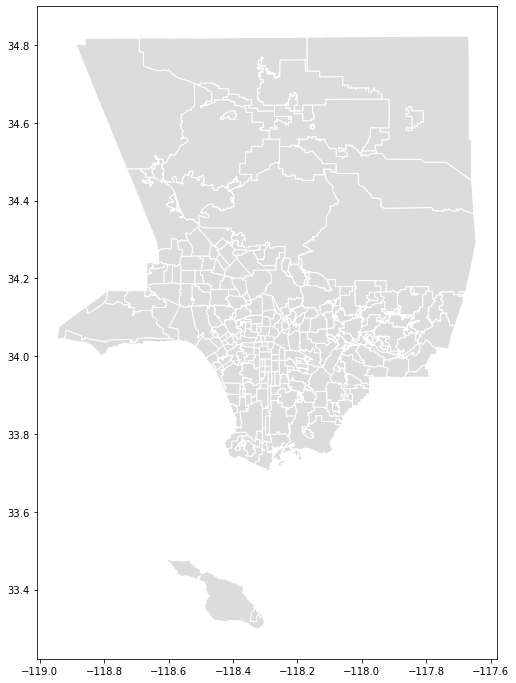

In [8]:
ax=neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

In [10]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata

In [22]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ax8j-dhzm", 
                     limit=5000,)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
df.head()

,locationtype,location_name,stnumber,stname,stsuffix,city,state,zip,website,phone,...,:@computed_region_tatf_ua23,:@computed_region_2dna_qi2s,stdirection,addresstype,addresstypevalue,:@computed_region_ur2y_g4cx,crossstname,stnumberfraction,crossstsuffix,stsuffixdirection
0,Beaches,Venice Beach,1800,Ocean Front,Walk,"{'latitude': '33.985', 'longitude': '-118.474'...",CA,90291,http://www.laparks.org/dos/reccenter/facility/...,(310) 399-2775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beaches,Cabrillo Beach,3720,Stephen M. White,Dr,"{'latitude': '33.7112', 'longitude': '-118.283...",CA,90731,http://www.laparks.org/dos/aquatic/facility/ca...,(310) 548-7554,...,793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Camps,Griffith Park Boys Camp,4730,Crystal Springs,Dr,"{'latitude': '34.139', 'longitude': '-118.298'...",CA,90027,http://www.laparks.org/dos/camps/griffith.htm,(323) 664-0571,...,1325,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Camps,Otis Wallace Children's Campground,11770,Foothill,Blvd,"{'latitude': '34.2657', 'longitude': '-118.396...",CA,91342,NaN,(818) 756-8060,...,248,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Camps,Griffith Park - Hollywoodland Girls Camp,3200,Canyon,Dr,"{'latitude': '34.1255', 'longitude': '-118.314...",CA,90068,http://www.laparks.org/dos/camps/hollywoodland...,(323) 467-7193,...,543,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head ()

,locationtype,location_name,stnumber,stname,stsuffix,city,state,zip,website,phone,councildistrict,geolat,geolong,:@computed_region_qz3q_ghft,:@computed_region_kqwf_mjcx,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_2dna_qi2s,stdirection,addresstype,addresstypevalue,:@computed_region_ur2y_g4cx,crossstname,stnumberfraction,crossstsuffix,stsuffixdirection
0,Beaches,Venice Beach,1800,Ocean Front,Walk,"{'latitude': '33.985', 'longitude': '-118.474'...",CA,90291,http://www.laparks.org/dos/reccenter/facility/...,(310) 399-2775,11,33.985013,-118.474064,25073,10,909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beaches,Cabrillo Beach,3720,Stephen M. White,Dr,"{'latitude': '33.7112', 'longitude': '-118.283...",CA,90731,http://www.laparks.org/dos/aquatic/facility/ca...,(310) 548-7554,15,33.711229,-118.283406,3342,NaN,2342,793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Camps,Griffith Park Boys Camp,4730,Crystal Springs,Dr,"{'latitude': '34.139', 'longitude': '-118.298'...",CA,90027,http://www.laparks.org/dos/camps/griffith.htm,(323) 664-0571,4,34.139017,-118.298335,23445,7,2326,1325,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Camps,Otis Wallace Children's Campground,11770,Foothill,Blvd,"{'latitude': '34.2657', 'longitude': '-118.396...",CA,91342,NaN,(818) 756-8060,7,34.26571,-118.3955,18912,1,2334,248,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Camps,Griffith Park - Hollywoodland Girls Camp,3200,Canyon,Dr,"{'latitude': '34.1255', 'longitude': '-118.314...",CA,90068,http://www.laparks.org/dos/camps/hollywoodland...,(323) 467-7193,4,34.125465,-118.314396,24033,7,2326,543,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
list(df)

['locationtype',
 'location_name',
 'stnumber',
 'stname',
 'stsuffix',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'councildistrict',
 'geolat',
 'geolong',
 ':@computed_region_qz3q_ghft',
 ':@computed_region_kqwf_mjcx',
 ':@computed_region_k96s_3jcv',
 ':@computed_region_tatf_ua23',
 ':@computed_region_2dna_qi2s',
 'stdirection',
 'addresstype',
 'addresstypevalue',
 ':@computed_region_ur2y_g4cx',
 'crossstname',
 'stnumberfraction',
 'crossstsuffix',
 'stsuffixdirection']

In [27]:
parks = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.geolong, df.geolat))

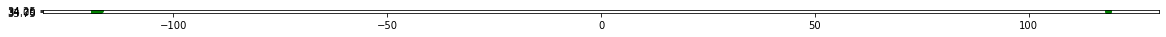

In [29]:
parks.plot(figsize=(20,20),color='green')